# Bayescan

In [1]:
source("../../../General_Methods/BayeScan2.1/R functions/plot_R.r")

## m80x55-OL-p100


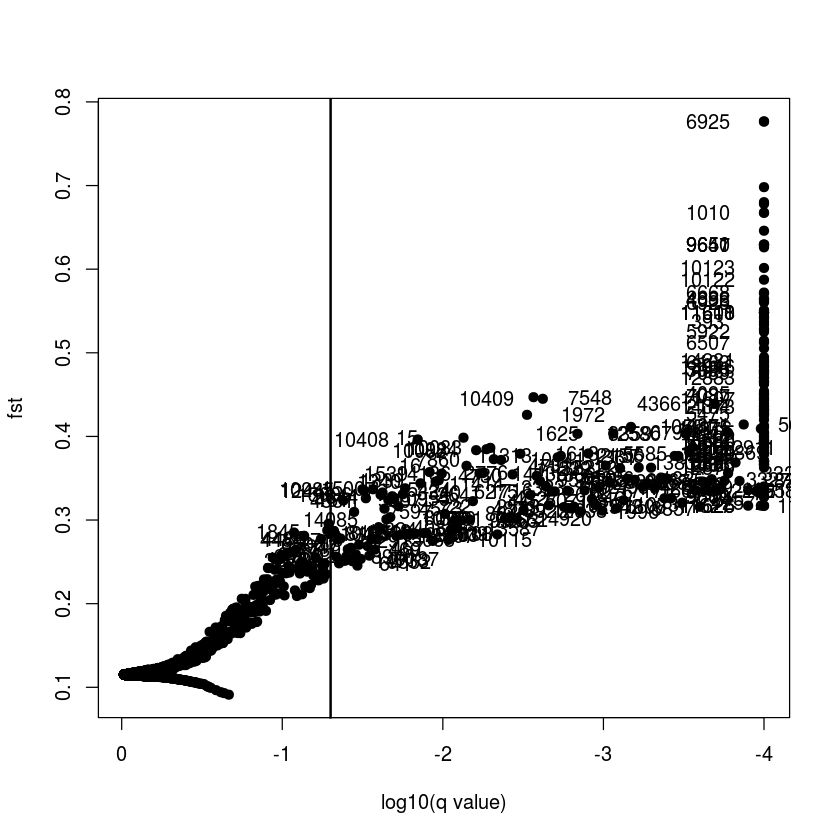

In [2]:
m80x55<- plot_bayescan("Outlier/OL-m80x55-maf025-filt-BS-po100-B_fst.txt",FDR=0.05)

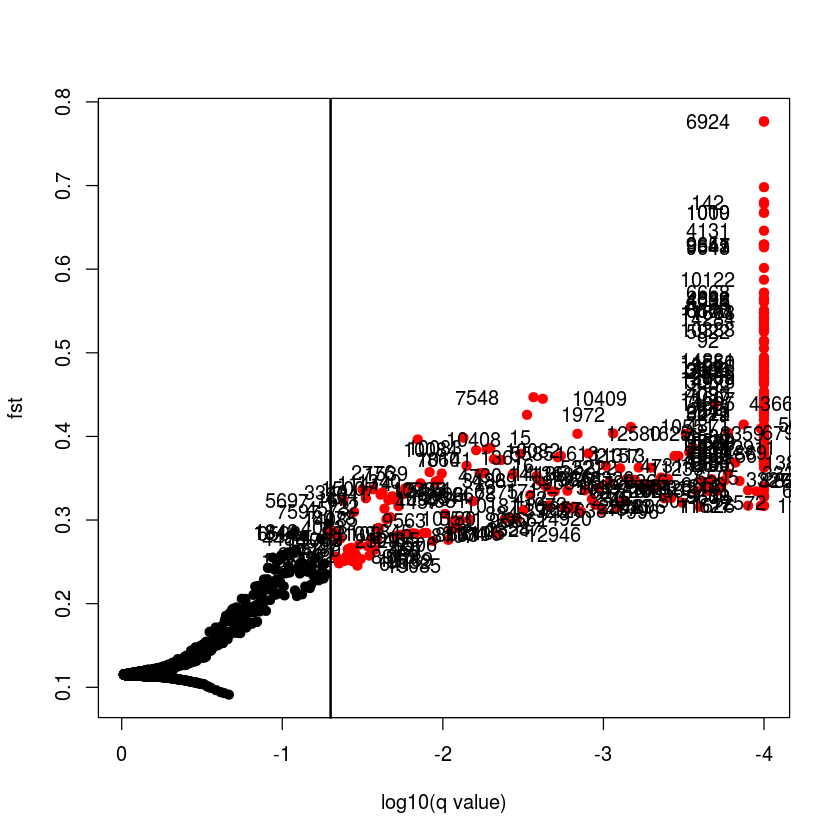

In [3]:
m80x55 <- plot_bayescan("Outlier/OL-m80x55-maf025-filt-BS-po100-B_fst.txt",highlight = m80x55$outliers,FDR=0.05)

In [4]:
m80x55$nb_outliers

[1] 271

In [5]:
snpsA <- read.table("../Inputs/OL-final-c85-t88-Breps-m80x55-maf025-filt-BS_markers_dictionary.tsv", header=TRUE)

In [6]:
outs_m80x55 <- as.character(snpsA[match(m80x55$outliers,snpsA[,2]),1])

In [7]:
head(outs_m80x55)

[1] "locus_100164__52__52" "locus_100164__53__53" "locus_100568__66__66"
[4] "locus_100799__46__46" "locus_100957__72__72" "locus_101638__78__78"

In [8]:
loci_m80x55 <- unique(unlist(strsplit(as.character(outs_m80x55),"_"))[seq(2,length(outs_m80x55)*6,6)])
write.table(loci_m80x55,file = "BSLoci_m80x55maf025_filt_100.txt",quote = F,row.names = F, col.names = F)

In [9]:
length(loci_m80x55)

[1] 179

# OutFlank
Requires OutFLANK and dependencies. Installation instructions an be found [here](https://github.com/whitlock/OutFLANK/blob/master/OutFLANK%20readme.pdf). Will filter based on He, so does not really matter what maf you give it.

In [10]:
library(OutFLANK)

Loading required package: qvalue


Read in data saved from adegenet object for maf > 2.5%. Format for MakeDiploidFSTMat for OutFLANK.

## m80x55-maf025-All

In [11]:
tab <- read.table("../Inputs/OL-c85t8-m80x50-maf025-filt.tab",header = TRUE,row.names = 1,na.strings = "NA")
snp <- tab[,seq(1,ncol(tab)-1,2)]
snp[is.na(snp)] <- 9 

regions <- read.table("../Inputs/OL-c85t8-m80x50.reg",header = F)
pops <- read.table("../Inputs/OL-c85t8-m80x50.pop",header = F)

Making input matrix for OutFLANK.

### Population

In [12]:
pop.mat <- MakeDiploidFSTMat(snp,colnames(snp),pops)

Calculating FSTs, may take a few minutes...
[1] "10000 done of 17015"


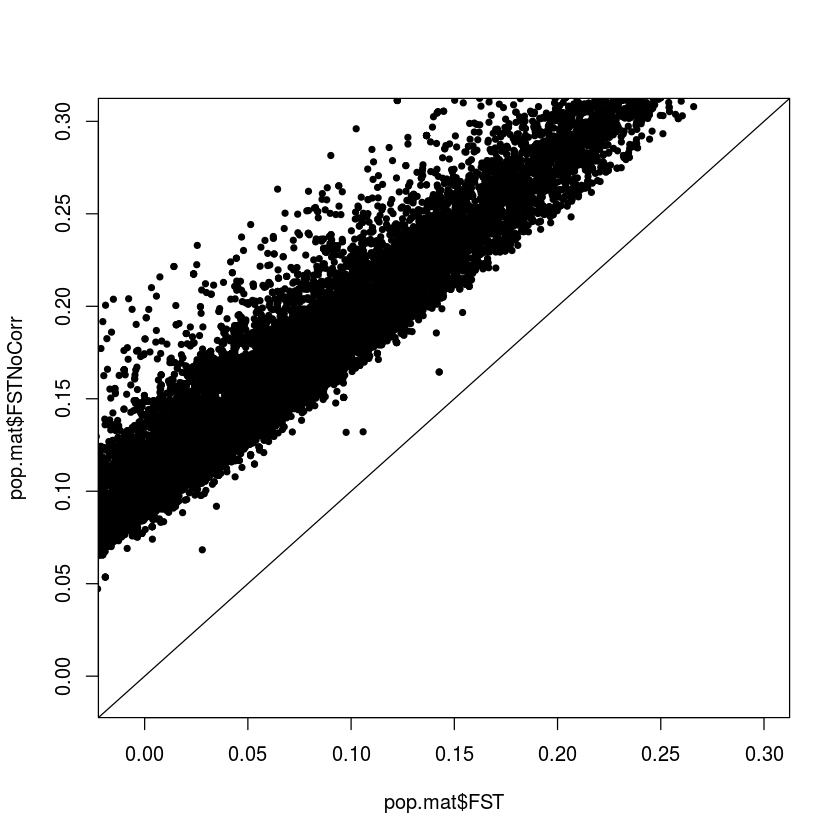

In [13]:
plot(pop.mat$FST, pop.mat$FSTNoCorr, xlim = c(-0.01,0.3), 
     ylim = c(-0.01, 0.3), pch = 20)
abline(0, 1)

### Running OUTFlank

In [14]:
pop.output <- OutFLANK(pop.mat,LeftTrimFraction=0.05,RightTrimFraction=0.05,Hmin=0.1,NumberOfSamples = length(unique(pops)) ,qthreshold=0.1)

### Plotting neutral dist

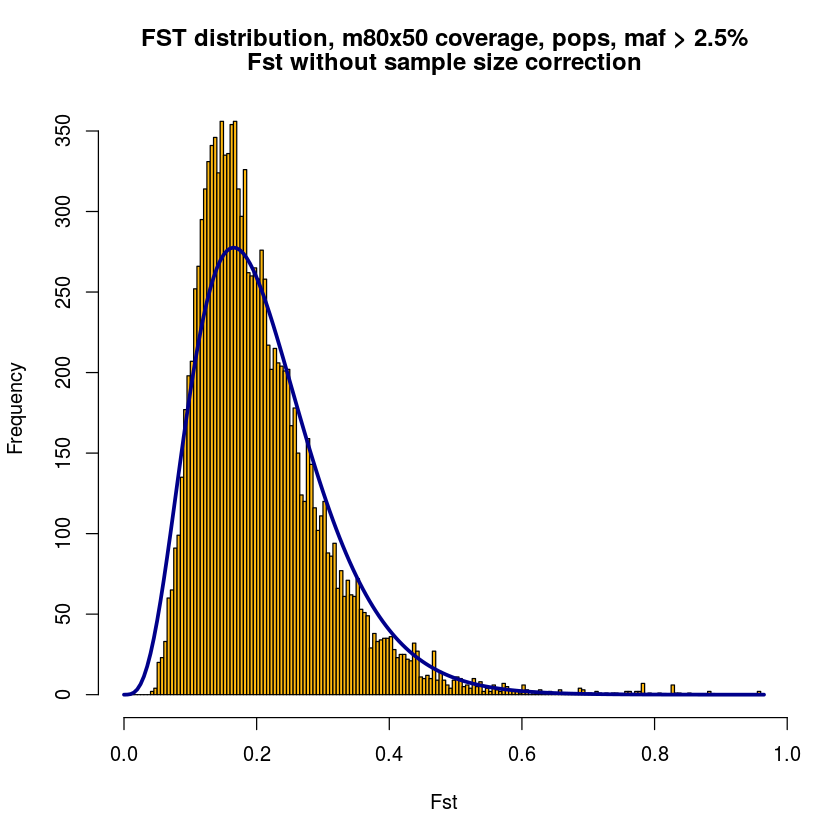

In [16]:
OutFLANKResultsPlotter(pop.output, withOutliers = TRUE,
NoCorr = TRUE, Hmin = 0.1, binwidth = 0.005, Zoom =
FALSE, RightZoomFraction = 0.05, titletext = "FST distribution, m80x50 coverage, pops, maf > 2.5%")

In [35]:
outliers_OF <- gsub('.{2}$', '', pop.output$results$LocusName[pop.output$results$OutlierFlag == TRUE])
print(outliers_OF)

 [1] "locus_100568__66__66" "locus_100957__72__72" "locus_128049__40__40"
 [4] "locus_128049__80__80" "locus_202687__78__78" "locus_214762__30__30"
 [7] "locus_217068__46__46" "locus_217068__61__61" "locus_217430__5__5"  
[10] "locus_22471__30__30"  "locus_23130__43__43"  "locus_28586__61__61" 
[13] "locus_28586__70__70"  "locus_29312__22__22"  "locus_29312__28__28" 
[16] "locus_29312__71__71"  "locus_308418__20__20" "locus_308418__24__24"
[19] "locus_34532__22__22"  "locus_346887__16__16" "locus_346887__34__34"
[22] "locus_346887__54__54" "locus_346887__56__56" "locus_346887__62__62"
[25] "locus_346887__88__88" "locus_356067__27__27" "locus_356067__67__67"
[28] "locus_35810__14__14"  "locus_35810__15__15"  "locus_370301__26__26"
[31] "locus_38660__64__64"  "locus_38660__76__76"  "locus_38660__82__82" 
[34] "locus_38660__84__84"  "locus_421469__28__28" "locus_421469__38__38"


In [36]:
length(outliers_OF)

[1] 36

In [38]:
pop.output$results[which(pop.output$results$OutlierFlag == TRUE),]

,LocusName,He,FST,T1,T2,FSTNoCorr,T1NoCorr,T2NoCorr,meanAlleleFreq,indexOrder,GoodH,qvalues,pvalues,pvaluesRightTail,OutlierFlag
95,locus_100568__66__66.A,0.2826349,0.6822376,0.10087486,0.14785885,0.7267890,0.10749105,0.14789856,0.82967033,95,goodH,0.07159922,4.663370e-04,2.331685e-04,TRUE
147,locus_100957__72__72.C,0.4868934,0.7400298,0.18879919,0.25512377,0.7846262,0.20020472,0.25515937,0.58095238,147,goodH,0.03928589,1.689850e-04,8.449250e-05,TRUE
1083,locus_128049__40__40.A,0.2954976,0.8636608,0.13481530,0.15609751,0.8805149,0.13745921,0.15611231,0.81976744,1083,goodH,0.03056475,3.027063e-05,1.513532e-05,TRUE
1086,locus_128049__80__80.G,0.2954976,0.8636608,0.13481530,0.15609751,0.8805149,0.13745921,0.15611231,0.81976744,1086,goodH,0.03056475,3.027063e-05,1.513532e-05,TRUE
3202,locus_202687__78__78.G,0.2378121,0.6658882,0.08282569,0.12438378,0.7159926,0.08908828,0.12442627,0.86206897,3202,goodH,0.08196675,5.624495e-04,2.812247e-04,TRUE
4219,locus_214762__30__30.C,0.2294226,0.7016304,0.08417694,0.11997332,0.7386259,0.08862943,0.11999232,0.13218391,4219,goodH,0.06007653,3.794307e-04,1.897154e-04,TRUE
4414,locus_217068__46__46.A,0.2034615,0.7265800,0.07753925,0.10671811,0.7609192,0.08122209,0.10674207,0.88505747,4414,goodH,0.04573764,2.567483e-04,1.283741e-04,TRUE
4417,locus_217068__61__61.A,0.2034615,0.7265800,0.07753925,0.10671811,0.7609192,0.08122209,0.10674207,0.11494253,4417,goodH,0.04573764,2.567483e-04,1.283741e-04,TRUE
4453,locus_217430__5__5.A,0.3101001,0.8115605,0.13252981,0.16330244,0.8323918,0.13594755,0.16332158,0.80813953,4453,goodH,0.03056475,7.212986e-05,3.606493e-05,TRUE
4854,locus_22471__30__30.G,0.2697704,0.7180823,0.10153620,0.14139911,0.7559974,0.10692180,0.14143144,0.16071429,4854,goodH,0.04727810,2.799361e-04,1.399681e-04,TRUE


In [39]:
write.table(outliers_OF,file = "m80x50maf025filt-outflank.txt", quote = F,row.names = F,col.names = F)

In [40]:
loci_OF <- unique(unlist(strsplit(as.character(outliers_OF),"_"))[seq(2,length(outliers_OF)*6,6)])
length(loci_OF)

[1] 19

In [42]:
write.table(loci_OF,file = "m80x50maf025filt-outflank.loci", quote = F,row.names = F,col.names = F)

### Regions

In [25]:
reg.mat <- MakeDiploidFSTMat(snp,colnames(snp),regions)

Calculating FSTs, may take a few minutes...
[1] "10000 done of 15664"


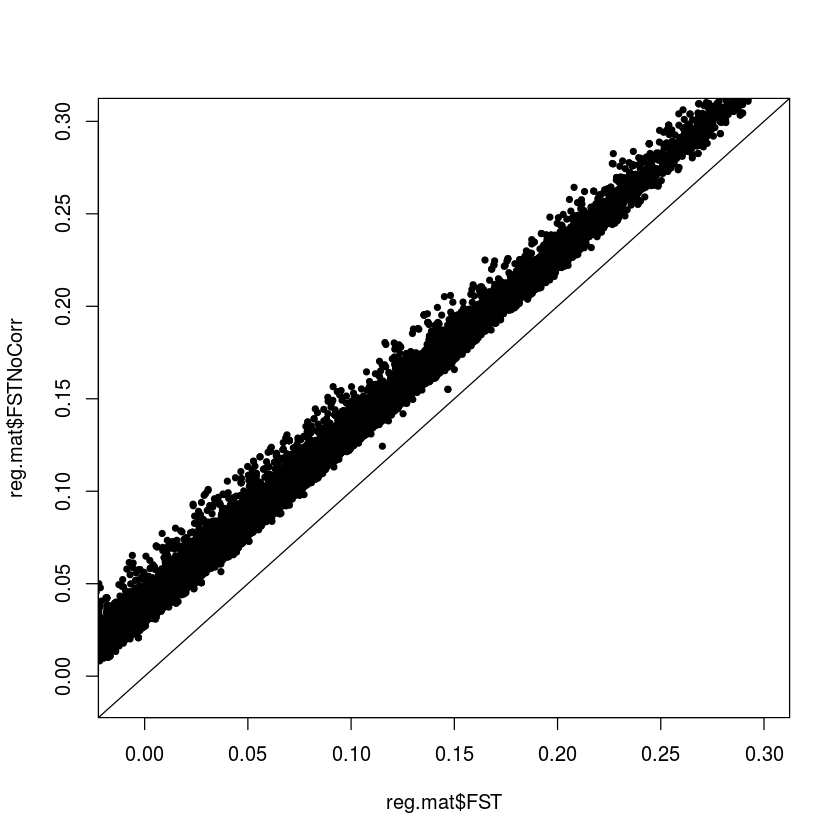

In [26]:
plot(reg.mat$FST, reg.mat$FSTNoCorr, xlim = c(-0.01,0.3), 
     ylim = c(-0.01, 0.3), pch = 20)
abline(0, 1)

In [27]:
reg.output <- OutFLANK(reg.mat,LeftTrimFraction=0.05,RightTrimFraction=0.05,Hmin=0.1,NumberOfSamples = length(unique(regions)) ,qthreshold=0.1)

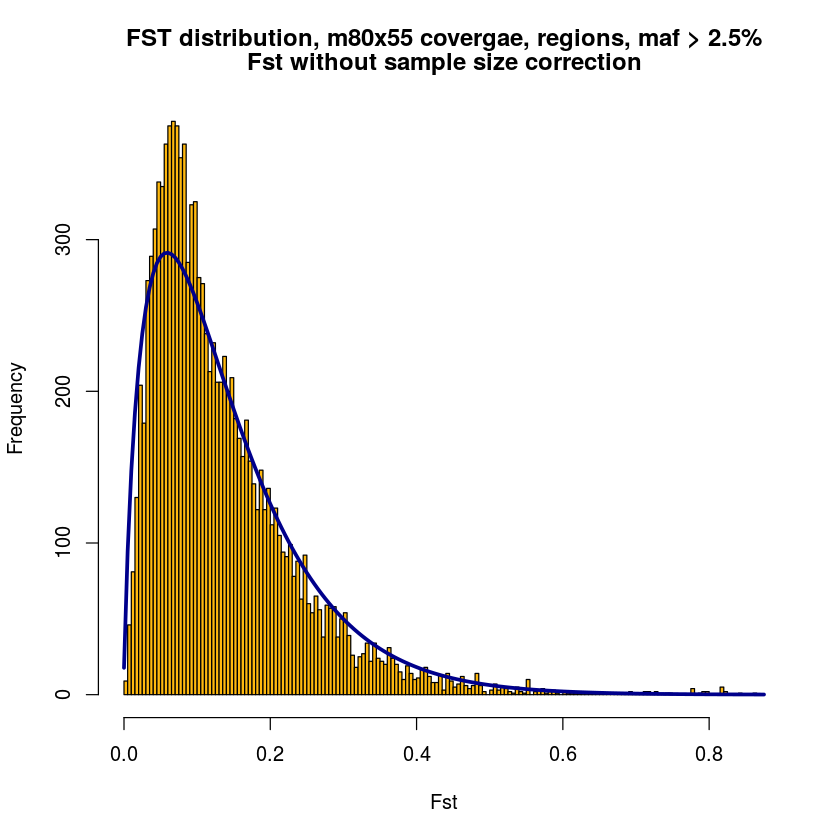

In [30]:
OutFLANKResultsPlotter(reg.output, withOutliers = TRUE,
NoCorr = TRUE, Hmin = 0.1, binwidth = 0.005, Zoom =
FALSE, RightZoomFraction = 0.05, titletext = "FST distribution, m80x55 covergae, regions, maf > 2.5%")

In [31]:
outliers_reg <- reg.output$results$LocusName[reg.output$results$OutlierFlag == TRUE]
print(outliers_reg)

factor(0)
15664 Levels: locus_100026__41__41.A1 ... locus_99992__58__58.A1


# PCAdapt

In [43]:
library("ggplot2")
library("pcadapt")

Loading required package: robust
Loading required package: fit.models
Loading required package: MASS
Loading required package: vcfR

   *****       ***   vcfR   ***       *****
   This is vcfR 1.7.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



In [127]:
# PCAdapt requires a pcadapt_class object. You can convert a matrix to 
# pcadapt_class with the read.pcadapt() function.
x <- read.pcadapt(snp,"m80x50_maf025_filt",local.env = T,type="lfmm")

Reading file tmp.pcadapt...
Number of SNPs: 17015
Number of individuals: 105
Number of SNPs with minor allele frequency lower than 0.05 ignored: 4242
164914 out of 1786575 missing data ignored.


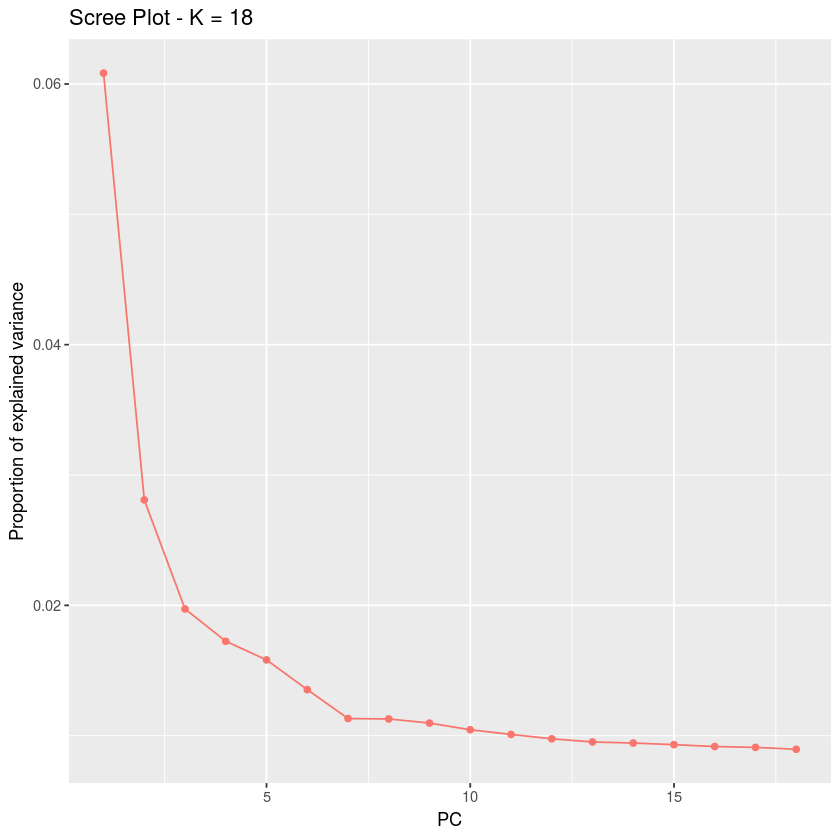

In [128]:
K <- 18
x <- pcadapt("tmp.pcadapt", K = K)
plot(x, option = "screeplot") # 6groups seems to be the correct value

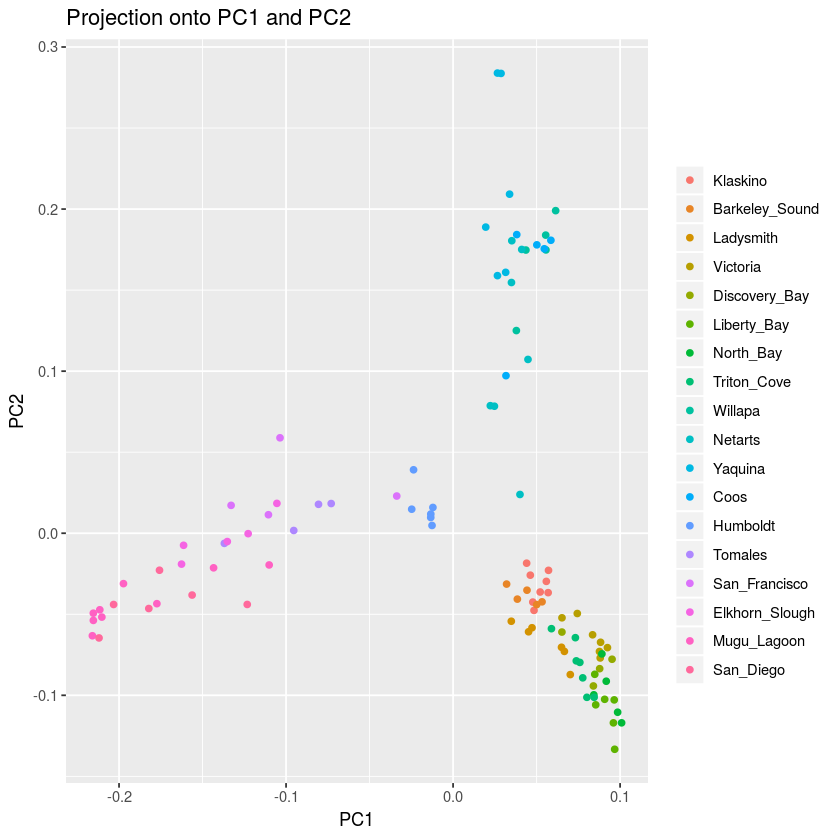

In [129]:
plot(x, option = "scores", pop= as.vector(pops[,1])) # how populations are shared among the 6 groups

In [130]:
K <- 5
x <- pcadapt("tmp.pcadapt", K = K, min.maf = 0.025)

summary(x)

Reading file tmp.pcadapt...
Number of SNPs: 17015
Number of individuals: 105
Number of SNPs with minor allele frequency lower than 0.025 ignored: 0
216964 out of 1786575 missing data ignored.


                Length Class  Mode   
maf             17015  -none- numeric
loadings        85075  -none- numeric
singular.values     5  -none- numeric
scores            525  -none- numeric
zscores         85075  -none- numeric
stat            17015  -none- numeric
gif                 1  -none- numeric
chi2.stat       17015  -none- numeric
pvalues         17015  -none- numeric

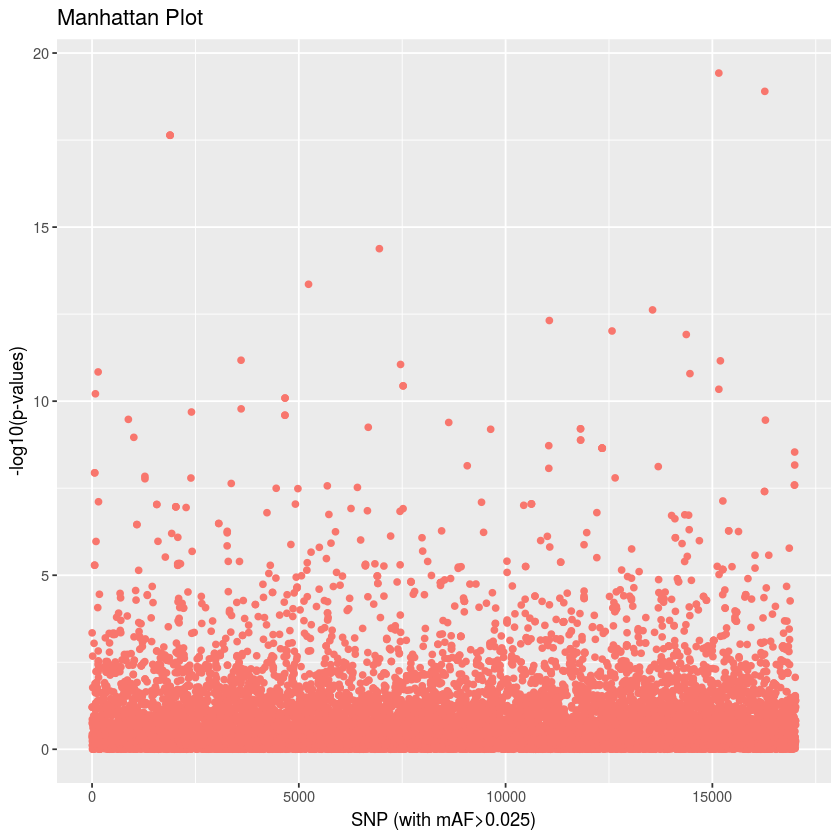

In [131]:
plot(x,option="manhattan")

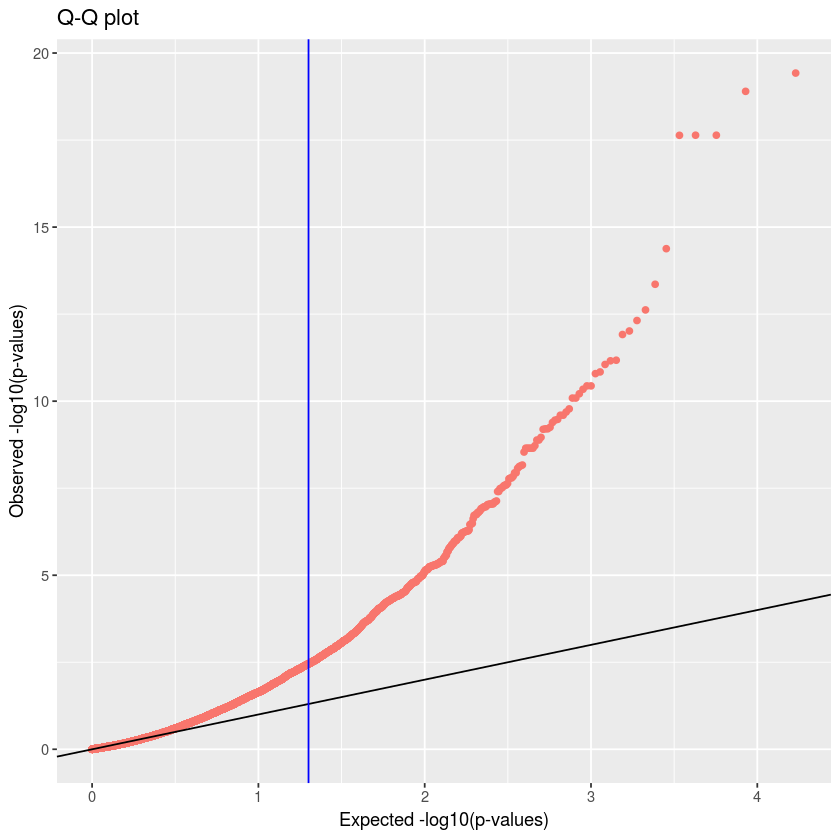

In [132]:
plot(x, option = "qqplot", threshold = 0.05)

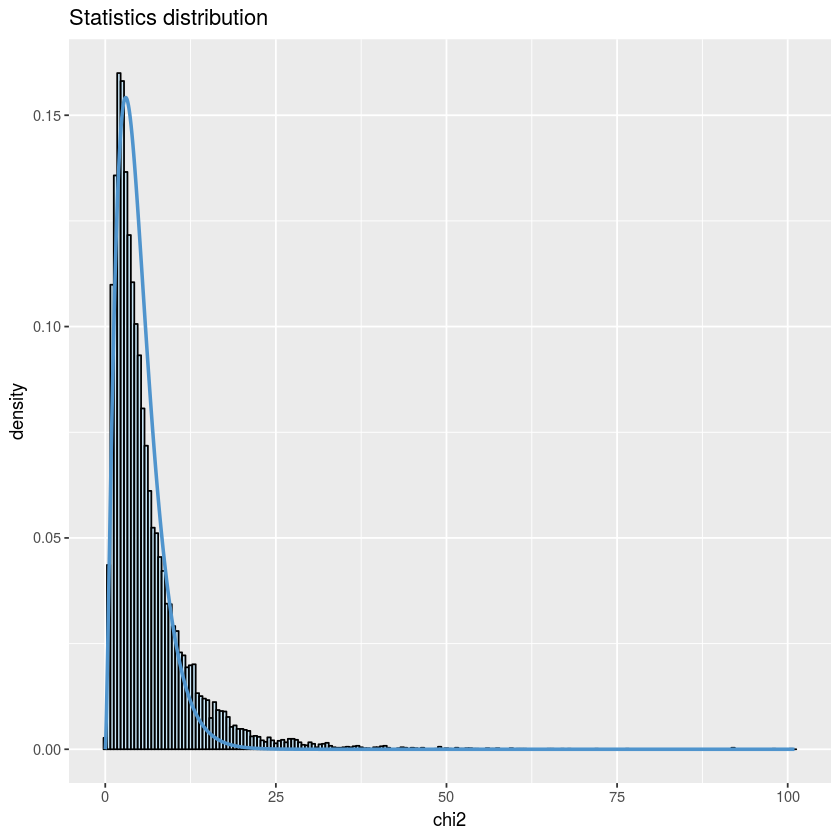

In [133]:
plot(x, option = "stat.distribution") # Distribution of Mahalanobis distances.

q-values

In [134]:
qval <- qvalue(x$pvalues)$qvalues
alpha <- 0.05
outliers_Q <- which(qval < alpha)
length(outliers_Q)

[1] 712

In [135]:
qval <- qvalue(x$pvalues)$qvalues
alpha <- 0.01
outliers_Q1 <- which(qval < alpha)
length(outliers_Q1)

[1] 393

In [136]:
snp_pc <- get.pc(x, outliers_Q)

In [137]:
outs_Q <- gsub('.{2}$', '', colnames(snp)[outliers_Q])
outs_Q1 <- gsub('.{2}$', '', colnames(snp)[outliers_Q1])


In [138]:
write.table(outs_Q,file = "m80x50maf025filt-pcadapt-q-snp.txt", quote = F,row.names = F,col.names = F)

In [139]:
loci_Q <- unique(unlist(strsplit(as.character(outs_Q),"_"))[seq(2,length(outs_Q)*6,6)])
length(loci_Q)

loci_Q1 <- unique(unlist(strsplit(as.character(outs_Q1),"_"))[seq(2,length(outs_Q1)*6,6)])
length(loci_Q1)


[1] 494

[1] 278

In [140]:
write.table(loci_Q,file = "m80x50maf025filt-pcadapt-q.loci", quote = F,row.names = F,col.names = F)

Benjamini-Hochberg Procedure

In [141]:
padj <- p.adjust(x$pvalues,method="BH")
alpha <- 0.05
outliers_BH <- which(padj < alpha)
length(outliers_BH)

[1] 712

Bonferroni correction

In [142]:
padj <- p.adjust(x$pvalues,method="bonferroni")
alpha <- 0.05
outliers_B <- which(padj < alpha)
length(outliers_B)

[1] 128

In [143]:
loci_B <- unique(unlist(strsplit(as.character(colnames(snp)[outliers_B]),"_"))[seq(2,length(outliers_B)*6,6)])
length(loci_B)

[1] 95

In [144]:
outs_B <- gsub('.{2}$', '', colnames(snp)[outliers_B])

In [145]:
write.table(loci_B,file = "m80x50maf025filt-pcadapt-B.loci", quote = F,row.names = F,col.names = F)

# Found in all analyses

In [166]:
write.table(intersect(outliers_pop,outliers_Q),file = "m80x50maf025filt-pcaQ_OF-union.snps", quote = F,row.names = F,col.names = F)

In [146]:
head(loci_Q)
head(loci_OF)
head(loci_m80x55)

[1] "100043" "100364" "100411" "100504" "100568" "100808"

[1] "100568" "100957" "128049" "202687" "214762" "217068"

[1] "100164" "100568" "100799" "100957" "101638" "101905"

In [147]:
#Loci Found in all three
write.table(intersect(intersect(loci_OF,loci_Q),loci_m80x55),file = "m80x50maf025filt-pcaQ_OF_BS-isect.txt", quote = F,row.names = F,col.names = F)
length(intersect(intersect(loci_OF,loci_Q),loci_m80x55))

length(intersect(intersect(loci_OF,loci_Q1),loci_m80x55))

[1] 15

[1] 11

In [148]:
#Loci Found in all three
write.table(intersect(intersect(loci_OF,loci_B),loci_m80x55),file = "m80x50maf025filt-pcaB_OF_BS-isect.txt", quote = F,row.names = F,col.names = F)
length(intersect(intersect(loci_OF,loci_B),loci_m80x55))

[1] 8

In [149]:
intersect(intersect(loci_OF,loci_Q),loci_m80x55)

[1] "100568" "100957" "128049" "202687" "214762" "217430" "23130"  "28586" 
 [9] "29312"  "34532"  "346887" "356067" "35810"  "38660"  "421469"

In [150]:
#Loci Found in at least 2
x <- unlist(list(loci_Q,loci_m80x55,loci_OF))
f <- table(x)
write.table(names(f)[f >= 2],file = "m80x50maf025filt-pcaQ_OF_BS-isect2.txt", quote = F,row.names = F,col.names = F)
length(names(f)[f >= 2])


[1] 101

In [151]:
#Loci Found in at least 2
x <- unlist(list(loci_B,loci_m80x55,loci_OF))
f <- table(x)
write.table(names(f)[f >= 2],file = "m80x55maf025filt-pcaB_OF_BS-isect2.txt", quote = F,row.names = F,col.names = F)
length(names(f)[f >= 2])

[1] 36

In [152]:
#Found in Outflank and Bayescan
length(intersect(loci_OF,loci_m80x55))

[1] 16

In [153]:
#Found in Bayescan and pcadapt
length(intersect(loci_B,loci_m80x55))
length(intersect(loci_Q,loci_m80x55))
length(intersect(loci_Q1,loci_m80x55))

[1] 28

[1] 97

[1] 65

In [154]:
#Found in Outflank and pcadapt
length(intersect(loci_OF,loci_Q))
length(intersect(loci_OF,loci_B))
length(intersect(loci_OF,loci_Q1))

[1] 18

[1] 8

[1] 13

In [155]:
#Union of all 3 loci

write.table(union(union(loci_OF,loci_Q),loci_m80x55),file = "m80x50maf025filt-pcaQ_OF_BS-union.txt", quote = F,row.names = F,col.names = F)
length(union(union(loci_OF,loci_Q),loci_m80x55))

write.table(union(union(loci_OF,loci_B),loci_m80x55),file = "m80x50maf025filt-pcaB_OF_BS-union.txt", quote = F,row.names = F,col.names = F)
length(union(union(loci_OF,loci_B),loci_m80x55))

[1] 576

[1] 249

In [156]:
#SNPs Found in all three
write.table(intersect(intersect(outliers_OF,outs_Q),outs_m80x55),file = "m80x50maf025filt-pcaQ_OF_BS-isect.snp", quote = F,row.names = F,col.names = F)
length(intersect(intersect(outliers_OF,outs_Q),outs_m80x55))

#SNPs Found in all three (B)
write.table(intersect(intersect(outliers_OF,outs_B),outs_m80x55),file = "m80x50maf025filt-pcaQ_OF_BS-isect.snp", quote = F,row.names = F,col.names = F)
length(intersect(intersect(outliers_OF,outs_B),outs_m80x55))

[1] 29

[1] 12

In [157]:
#Found in Outflank and Bayescan
length(intersect(outliers_OF,outs_m80x55))

[1] 32

In [158]:
#Found in Bayescan and pcadapt
length(intersect(outs_Q,outs_m80x55))
length(intersect(outs_B,outs_m80x55))

[1] 129

[1] 31

In [42]:
#Found in Outflank and pcadapt
length(intersect(outliers_OF,outs_Q))
length(intersect(outliers_OF,outs_B))

[1] 29

[1] 12

In [159]:
#SNPs Found in at least 2
x <- unlist(list(outs_Q,outliers_OF,outs_m80x55))
f <- table(x)
write.table(names(f)[f >= 2],file = "m80x50maf025filt-pcaQ_OF_BS-isect2.snp", quote = F,row.names = F,col.names = F)
length(names(f)[f >= 2])

#SNPs Found in at least 2
x <- unlist(list(outs_B,outliers_OF,outs_m80x55))
f <- table(x)
write.table(names(f)[f >= 2],file = "m80x50maf025filt-pcaB_OF_BS-isect2.snp", quote = F,row.names = F,col.names = F)
length(names(f)[f >= 2])

[1] 136

[1] 51

In [160]:
#Union of all 3- SNPs

write.table(union(union(outs_Q,outliers_OF),outs_m80x55),file = "m80x50maf025filt-pcaQ_OF_BS-union.snp", quote = F,row.names = F,col.names = F)
length(union(union(outs_Q,outliers_OF),outs_m80x55))

write.table(union(union(outs_B,outliers_OF),outs_m80x55),file = "m80x50maf025filt-pcaB_OF_BS-union.snp", quote = F,row.names = F,col.names = F)
length(union(union(outs_B,outliers_OF),outs_m80x55))

[1] 854

[1] 372